<a href="https://colab.research.google.com/github/cartika/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import plotly.graph_objs as go
import plotly.express as px

import pylab as pl
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
!pip install nltk
import nltk 
!python3 -c "import nltk; nltk.download('all')"
# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

#stop-words

nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
netflix_df = pd.read_csv('/content/drive/MyDrive/capstone-4/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [4]:
netflix_df.shape

(7787, 12)

#**Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

#**NULL VALUES**

In [5]:
netflix_df.isnull().sum()/netflix_df.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [6]:
netflix_df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [7]:
netflix_df['country'].value_counts()

United States                                     2555
India                                              923
United Kingdom                                     397
Japan                                              226
South Korea                                        183
                                                  ... 
United Kingdom, Poland                               1
France, Japan                                        1
United States, United Kingdom, Denmark, Sweden       1
Spain, Colombia                                      1
United States, United Kingdom, India                 1
Name: country, Length: 681, dtype: int64

 **NULL VALUE TREATMENT**

**1. RATING & COUNTRY - As rating column has 0.08% null values , so replacing nulls with mose frequent TV-MA rating and doing same thing with country column**


**2. CAST - cast column has too many different values and more than 9% are missing, so there is no need to keep it but we are keeping it to perform EDA**


**3. DATE - there are few missing values for date column. so, lets drop missing value rows.**

**4. DIRECTOR -  Director column has more then 30% null values so dropping that column**



In [8]:
netflix_df['rating'].replace(np.nan, 'TV-MA',inplace  = True)
netflix_df['country'].replace(np.nan, 'United States',inplace  = True)
netflix_df['cast'].replace(np.nan, 'missing info',inplace  = True)

netflix_df= netflix_df.drop(columns= ['director'],axis=1)

In [9]:
netflix_df = netflix_df[netflix_df['date_added'].notna()]

In [10]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**NEW FEATURES**

In [11]:
# add new features
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

#**EDA**

In [12]:
x = netflix_df['type'].value_counts().reset_index()

colors=['royalblue','darkblue']
fig = px.pie(x,values='type',names='index',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

In [13]:
country = netflix_df['country'].value_counts().reset_index()
country = country[country['country'] /  country['country'].sum() > 0.01]

fig = px.pie(country, values='country', names='index',color_discrete_sequence=px.colors.sequential.Reds)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'black', width = 2)))
fig.show()


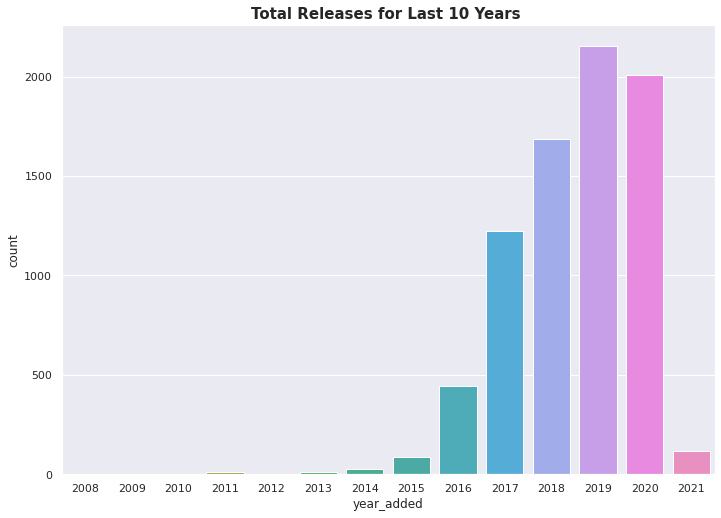

In [14]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='year_added',data=netflix_df)

plt.title('Total Releases for Last 10 Years ',size='15',fontweight="bold")    
plt.show()

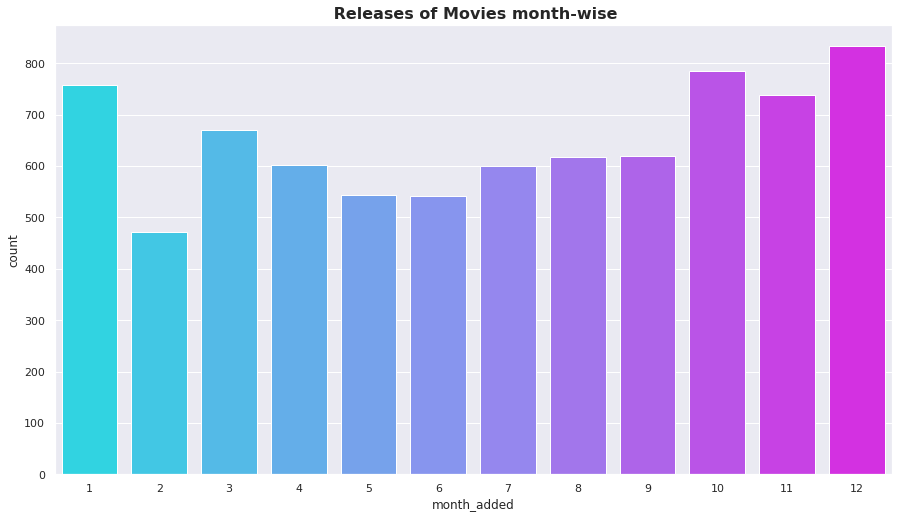

In [15]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.countplot(x='month_added',data=netflix_df,palette="cool")

plt.title(' Releases of Movies month-wise',size='16',fontweight="bold")    
plt.show()

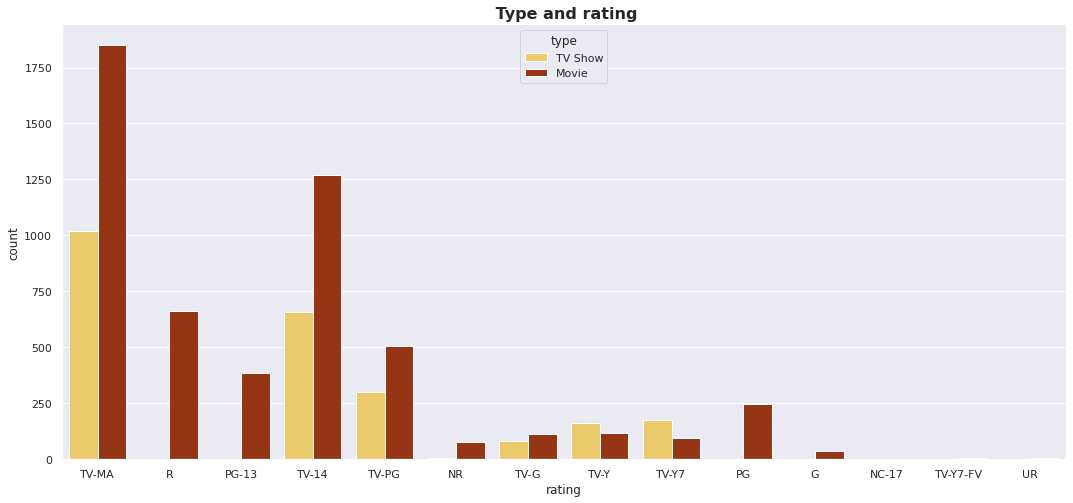

In [16]:
plt.figure(figsize=(18,8))
sns.countplot(x='rating',hue='type',data=netflix_df,palette="afmhot_r")
plt.title(' Type and rating',size='16',fontweight="bold")
plt.show()

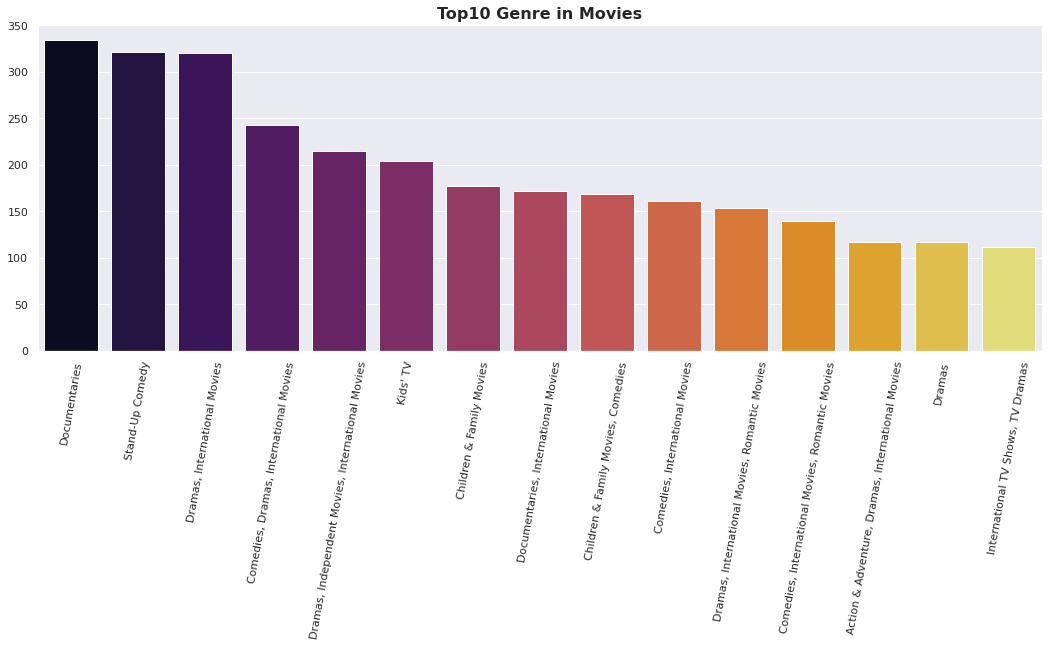

In [17]:
plt.figure(figsize=(18,6))
sns.barplot(x = netflix_df["listed_in"].value_counts().head(15).index,
            y = netflix_df["listed_in"].value_counts().head(15).values,palette="inferno")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.show()

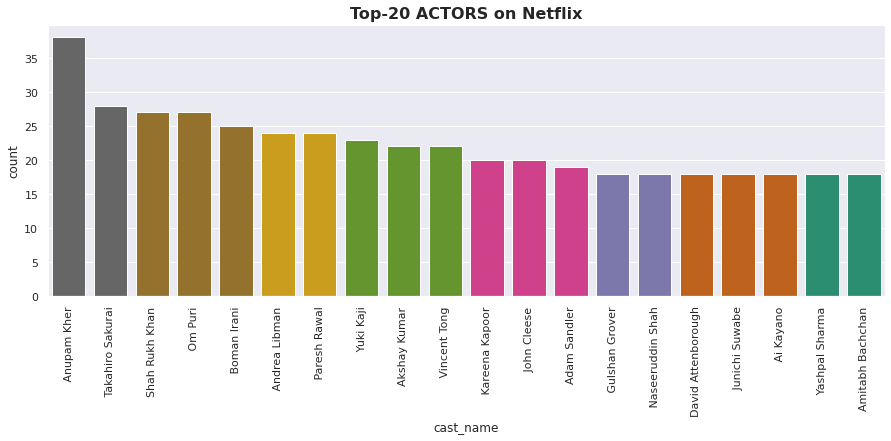

In [18]:
netflix_df['cast_name'] = netflix_df['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in netflix_df['cast_name']: cast_count += i
    
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2_r")
plt.title("Top-20 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

In [19]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   cast          7777 non-null   object        
 4   country       7777 non-null   object        
 5   date_added    7777 non-null   datetime64[ns]
 6   release_year  7777 non-null   int64         
 7   rating        7777 non-null   object        
 8   duration      7777 non-null   object        
 9   listed_in     7777 non-null   object        
 10  description   7777 non-null   object        
 11  year_added    7777 non-null   int64         
 12  month_added   7777 non-null   int64         
 13  cast_name     7777 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 1.2+ MB


In [20]:
netflix_df['duration']=netflix_df['duration'].str.replace('Season','')
netflix_df['duration']=netflix_df['duration'].str.replace('s','')
netflix_df['duration']=netflix_df['duration'].str.replace('min','')

netflix_df['duration']=netflix_df['duration'].astype(str).astype(int)
netflix_df['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7777, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



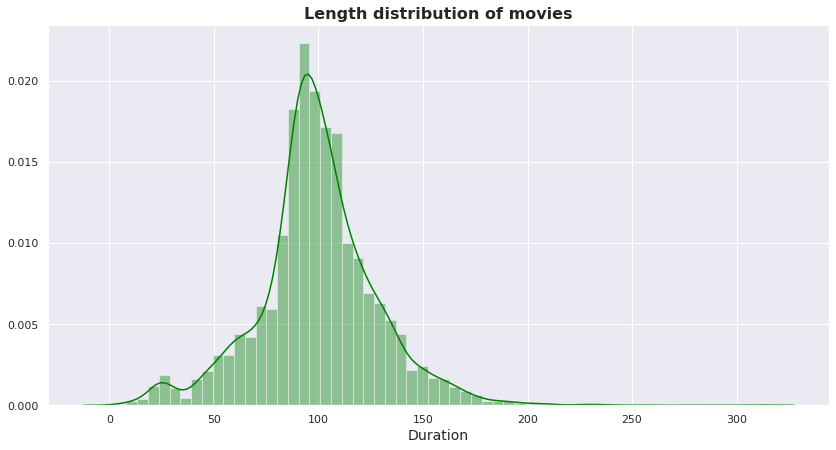

In [21]:
movie_df = netflix_df[netflix_df['type']=='Movie']

plt.figure(figsize=(14, 7))

sns.distplot(movie_df['duration'], bins=60,color='green').set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()

In [22]:
tv_df = netflix_df[netflix_df['type']=='TV Show']
tv_df['duration'].value_counts()


tv=tv_df['duration'].value_counts().T.reset_index()


fig = px.pie(tv,values='duration',names='index',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title="season-wise distribution of tv shows")
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker=dict( line=dict(color='#000000', width=2)))


**LONGEST TV - SHOWS**

In [23]:
long_shows = tv_df[tv_df['duration']>9]
long_shows_df = long_shows[['title','duration']]
long_shows_df.sort_values(by=['duration'],ascending=False)

,title,duration
2538,Grey's Anatomy,16
4438,NCIS,15
5912,Supernatural,15
1471,COMEDIANS of the world,13
1537,Criminal Minds,12
7169,Trailer Park Boys,12
1300,Cheers,11
2678,Heartland,11
1577,Dad's Army,10
1597,Danger Mouse: Classic Collection,10


# **DATA CLEANING AND PREPROCESSING**

LABEL ENCODING

In [24]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'cast_name'],
      dtype='object')

In [25]:
movie_df.drop(columns=['show_id', 'title', 'cast', 'date_added',
          'description', 'cast_name'],axis=1,inplace=True)

tv_df.drop(columns=['show_id', 'title', 'cast', 'date_added',
          'description', 'cast_name'],axis=1,inplace=True)

new_netflix_df = netflix_df.drop(columns=['show_id', 'title', 'cast', 'date_added',
          'description', 'cast_name'],axis=1)
movie_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,type,country,release_year,rating,duration,listed_in,year_added,month_added
1,Movie,Mexico,2016,TV-MA,93,"Dramas, International Movies",2016,12
2,Movie,Singapore,2011,R,78,"Horror Movies, International Movies",2018,12
3,Movie,United States,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",2017,11
4,Movie,United States,2008,PG-13,123,Dramas,2020,1
6,Movie,Egypt,2019,TV-MA,95,"Horror Movies, International Movies",2020,6
...,...,...,...,...,...,...,...,...
7781,Movie,United States,2006,PG,88,"Children & Family Movies, Comedies",2020,1
7782,Movie,"Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99,"Dramas, International Movies",2020,10
7783,Movie,India,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",2019,3
7784,Movie,United States,2019,TV-MA,44,"Documentaries, International Movies, Music & M...",2020,9


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_netflix_df["type"] = le.fit_transform(new_netflix_df["type"])
new_netflix_df["country"] = le.fit_transform(new_netflix_df["country"])

new_netflix_df['rating'] = le.fit_transform(new_netflix_df['rating'])
new_netflix_df['listed_in'] = le.fit_transform(new_netflix_df['listed_in'])

**TEXT CLEANING**

In [27]:
#combining genre and description column 
text_df = netflix_df['listed_in'] + netflix_df['description']
text_df

0       International TV Shows, TV Dramas, TV Sci-Fi &...
1       Dramas, International MoviesAfter a devastatin...
2       Horror Movies, International MoviesWhen an arm...
3       Action & Adventure, Independent Movies, Sci-Fi...
4       DramasA brilliant group of students become car...
                              ...                        
7782    Dramas, International MoviesWhen Lebanon's Civ...
7783    Dramas, International Movies, Music & Musicals...
7784    Documentaries, International Movies, Music & M...
7785    International TV Shows, Reality TVDessert wiza...
7786    Documentaries, Music & MusicalsThis documentar...
Length: 7777, dtype: object

In [28]:
#fuction for cleaning text
def clean_text(text):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(text)
    tokens=[le.lemmatize(w) for w in word_tokens if w not in STOPWORDS and len(w)>3]
    cleaned_text=" ".join(tokens)
    return cleaned_text

In [29]:
new_text_df = text_df.apply(clean_text)
new_text_df

0       International Shows Dramas Sci-Fi FantasyIn fu...
1       Dramas International MoviesAfter devastating e...
2       Horror Movies International MoviesWhen army re...
3       Action Adventure Independent Movies Sci-Fi Fan...
4       DramasA brilliant group student become card-co...
                              ...                        
7782    Dramas International MoviesWhen Lebanon Civil ...
7783    Dramas International Movies Music MusicalsA sc...
7784    Documentaries International Movies Music Music...
7785    International Shows Reality TVDessert wizard A...
7786    Documentaries Music MusicalsThis documentary d...
Length: 7777, dtype: object

**EXTRACTING THE FEATURES AND CREATING THE DOCUMENT-TERM-MATRIX ( DTM )**


1) LSA is generally implemented with Tfidf values everywhere and not with the Count Vectorizer.

2) max_features depends on your computing power and also on eval. metric (coherence score is a metric for topic model). Try the value that gives best eval. metric and doesn't limits processing power.

3) Default values for min_df & max_df worked well.

4) Can try different values for ngram_range.

In [30]:
vect =TfidfVectorizer(stop_words=STOPWORDS,max_features=1000)
vect_text=vect.fit_transform(new_text_df)
print(vect.get_feature_names())

['000', '10', '1970s', '1980s', 'ability', 'abuse', 'academy', 'accident', 'accidentally', 'account', 'accused', 'across', 'action', 'activist', 'actor', 'actress', 'adult', 'adventure', 'adventurea', 'affair', 'africa', 'african', 'aged', 'agent', 'aging', 'agrees', 'alien', 'along', 'also', 'always', 'ambition', 'ambitious', 'america', 'american', 'amid', 'among', 'ancient', 'angeles', 'animal', 'animated', 'anime', 'another', 'answer', 'anthology', 'anything', 'apart', 'apartment', 'army', 'around', 'arrives', 'art', 'artist', 'aspiring', 'assassin', 'athlete', 'attack', 'attempt', 'audience', 'avenge', 'away', 'baby', 'bachelor', 'back', 'band', 'bank', 'based', 'battle', 'bear', 'beautiful', 'beauty', 'become', 'becomes', 'becoming', 'befriends', 'begin', 'behind', 'belief', 'beloved', 'best', 'better', 'beyond', 'biggest', 'bill', 'biopic', 'birth', 'birthday', 'black', 'body', 'bollywood', 'bond', 'book', 'bos', 'boy', 'boyfriend', 'brave', 'break', 'bride', 'bring', 'brings', '

In [31]:
idf=vect.idf_
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(l[0],l[-1])
print(dd['international'])
print(dd['bear']) 

international bear
1.7552031425318138
6.963322241161702


In [32]:
new_text_df.head()

0    International Shows Dramas Sci-Fi FantasyIn fu...
1    Dramas International MoviesAfter devastating e...
2    Horror Movies International MoviesWhen army re...
3    Action Adventure Independent Movies Sci-Fi Fan...
4    DramasA brilliant group student become card-co...
dtype: object

**TOPIC MODELLING**

In [33]:
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)
print(lsa_top[0])
print(lsa_top.shape)

[ 0.20293519  0.06241257  0.09475694 -0.08713914 -0.0650609  -0.02444255
 -0.07402874 -0.03990399  0.12184251  0.05616824]
(7777, 10)


In [34]:
l=lsa_top[0]
print("NETFLIX TOPIC 0 :")
for i,topic in enumerate(l):
  print("NETFLIX Topic ",i," : ",topic*100)

NETFLIX TOPIC 0 :
NETFLIX Topic  0  :  20.293518661994035
NETFLIX Topic  1  :  6.241257318387807
NETFLIX Topic  2  :  9.47569436957944
NETFLIX Topic  3  :  -8.713913876715495
NETFLIX Topic  4  :  -6.506089873671386
NETFLIX Topic  5  :  -2.444254873929851
NETFLIX Topic  6  :  -7.402874460925933
NETFLIX Topic  7  :  -3.9903987527863145
NETFLIX Topic  8  :  12.18425060200353
NETFLIX Topic  9  :  5.616823582343085


**Similalry for other documents we can do this. However note that values don't add to 1 as in LSA it is not probabiltiy of a topic in a document.**

In [35]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(10, 1000)
[[ 0.00656765  0.00545324  0.00756655 ...  0.13097143  0.008755
   0.0057369 ]
 [ 0.00463957 -0.00387344  0.00036291 ... -0.0597857  -0.00522815
   0.00116565]
 [ 0.00358206  0.00043861  0.00152986 ... -0.04092356 -0.00215488
   0.00068989]
 ...
 [ 0.0032807   0.00438    -0.00305445 ...  0.0173375  -0.00310734
   0.00369738]
 [ 0.00831187 -0.00264949 -0.00792638 ... -0.0038689  -0.00092768
  -0.00365867]
 [ 0.00871115 -0.00352474  0.00177444 ...  0.22019193 -0.00048612
  -0.00434304]]


**TOP-10  TOPICS ON NETFLIX**

In [36]:
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print(" NETFLIX Genre "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

 NETFLIX Genre 0: 
international shows movies dramas comedies romantic family life independent young 

 NETFLIX Genre 1: 
shows crime british spanish language korean docuseries series reality romantic 

 NETFLIX Genre 2: 
adventure action fi sci kids stand family children world series 

 NETFLIX Genre 3: 
stand special comedy comedian comic talk family take show life 

 NETFLIX Genre 4: 
family children movies shows save friend christmas comedieswhen music kids 

 NETFLIX Genre 5: 
documentaries documentary music world docuseries series moviesthis sports life international 

 NETFLIX Genre 6: 
comedies romantic friend kids love life school best high series 

 NETFLIX Genre 7: 
series kids independent docuseries dramas friend science nature anime world 

 NETFLIX Genre 8: 
horror movies fi sci romantic series reality kids thrillersa docuseries 

 NETFLIX Genre 9: 
life docuseries young woman reality nature love science family romantic 



**1. we can see that the topic modelling did the genre analysis in movies and tv shows**

**2. each topic identifies genre of movies an tv shows on netflix**

#**Latent Dirichlet Allocation (LDA)**

In [37]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
# n_components is the number of topics
lda_top=lda_model.fit_transform(vect_text)
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top[0])

(7777, 10)
[0.02414418 0.12414676 0.12962484 0.02414177 0.02414211 0.02414732
 0.3367446  0.0241459  0.26460777 0.02415474]


In [38]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)
# composition of doc 0 for eg
print("Doc 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

1.0
Doc 0: 
Topic  0 :  2.414418237824914 %
Topic  1 :  12.414675939768511 %
Topic  2 :  12.962484438372016 %
Topic  3 :  2.4141769370311152 %
Topic  4 :  2.414210550964713 %
Topic  5 :  2.4147321526635572 %
Topic  6 :  33.67446039682234 %
Topic  7 :  2.4145900255744133 %
Topic  8 :  26.46077727131408 %
Topic  9 :  2.415474049664368 %


In [ ]:
print(lda_model.components_[0])
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

**most important features for each topic**

In [40]:
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:5]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
family international dramas movies children 

Topic 1: 
shows rich chance body chef 

Topic 2: 
stand special action dramas international 

Topic 3: 
music social former becoming hope 

Topic 4: 
documentary documentaries sports moviesthis comedy 

Topic 5: 
international romantic shows dramas comedies 

Topic 6: 
kids series docuseries reality anime 

Topic 7: 
international movies shows crime dramas 

Topic 8: 
sci fi action adventure movies 

Topic 9: 
shows spanish language crime bond 



## **GENRE WORDCLOUD**

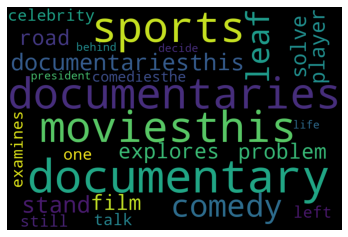

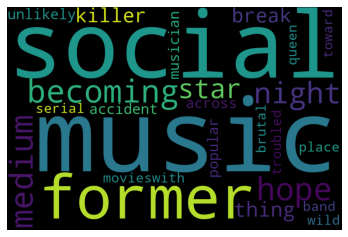

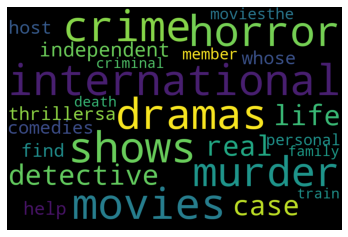

In [41]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:25]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]
  
  wordcloud = WordCloud(width=900, height=600).generate(imp_words_topic)
  plt.subplots(figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
# topic 0

draw_word_cloud(4)
draw_word_cloud(3)
draw_word_cloud(7)

**As we can see from the wordcloud that from two topics one is about documentries and other is about kids shows, therefore, topic modelling successfully classifies movies and shows into genre**

# **MOVIE RECOMMENDATION**

In [42]:
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix_df['description'] = netflix_df['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(7777, 17893)

In [43]:
#cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [44]:
movie_names = pd.Series(netflix_df.index, index=netflix_df['title'])

In [45]:
# Function that outputs most similar movies
def recommended_movies_and_shows(title, cosine_sim=cosine_sim):
    name = movie_names[title]
    sim_scores = list(enumerate(cosine_sim[name]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of similar movies
    sim_scores = sim_scores[1:6]
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 5 most similar movies
    return netflix_df['title'].iloc[movie_indices]


In [46]:
print('IF YOU WATCHED CRIMINAL MINDS,YOU WILL LIKE\n\n',recommended_movies_and_shows('Criminal Minds'))

IF YOU WATCHED CRIMINAL MINDS,YOU WILL LIKE

 4281    Mundeyan Ton Bachke Rahin
1538             Criminal: France
1540              Criminal: Spain
3868               Mahjong Heroes
1303             Chef & My Fridge
Name: title, dtype: object


In [47]:
print('IF YOU WATCHED ​​Kuch Bheege Alfaaz,YOU WILL LIKE\n\n',recommended_movies_and_shows('​​Kuch Bheege Alfaaz'))

IF YOU WATCHED ​​Kuch Bheege Alfaaz,YOU WILL LIKE

 7375                       Us and Them
1659                            Deaf U
4151             Mission: Destroy Love
6031    Terrace House: Tokyo 2019-2020
5760               Spirit: Riding Free
Name: title, dtype: object


# **K-MEANS**

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_mm = scaler.fit_transform(new_netflix_df)
netflix = pd.DataFrame(df_mm, columns=list(new_netflix_df.columns))
X = netflix
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(netflix).score(netflix) for i in range(len(kmeans))]

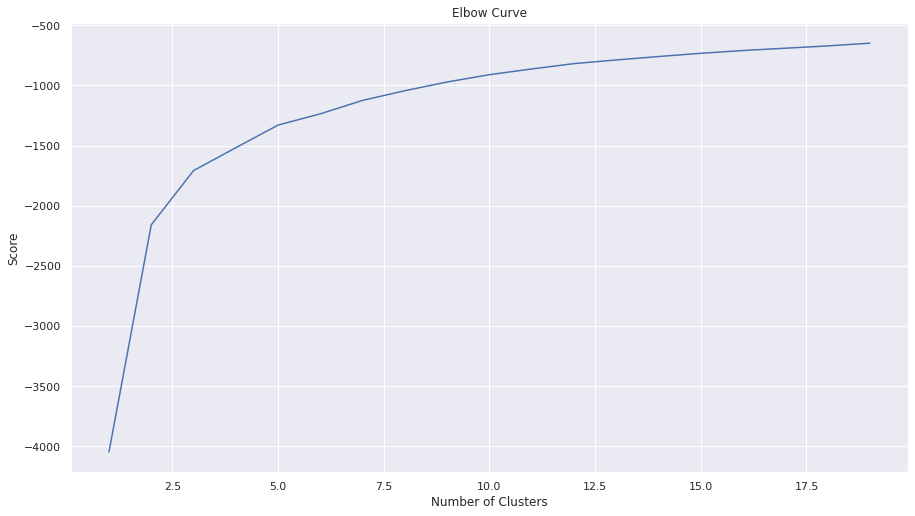

In [49]:
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [50]:
#fitting
kmeans = KMeans(n_clusters=5)
kmeans.fit(netflix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [81]:
len(kmeans.labels_)

netflix_df['cluster'] = kmeans.labels_
netflix_df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,cast_name,cluster
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,"[João Miguel, Bianca Comparato, Michel Gomes...",2
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",3
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",1
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,"[Elijah Wood, John C. Reilly, Jennifer Conne...",1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,1,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",4


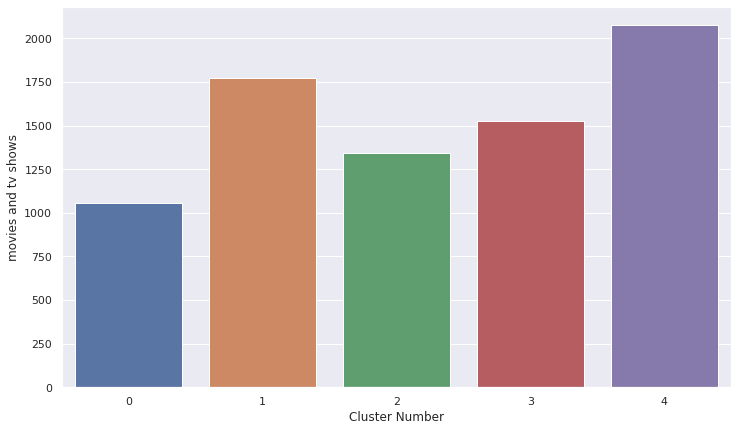

In [82]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=netflix_df.groupby(['cluster']).count()['type'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("movies and tv shows")


We clearly see that one cluster is the largest and one cluster has the fewest number of movies.

In [54]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(netflix)

print(len(kmeans.labels_))
netflix_df['cluster'] = kmeans.labels_
netflix_df.head()

7777


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,cast_name,cluster
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,"[João Miguel, Bianca Comparato, Michel Gomes...",2
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",3
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",1
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,"[Elijah Wood, John C. Reilly, Jennifer Conne...",1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,1,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",4


In [55]:
netflix_df.groupby(['cluster']).mean()

,release_year,duration,year_added,month_added
cluster,,,,
0,2016.283822,1.774834,2018.681173,3.456008
1,2013.034969,91.384659,2018.313029,9.421320
2,2016.155622,1.749814,2018.399851,9.688757
3,2012.426326,108.979699,2018.418468,8.827112
4,2013.184882,98.961001,2018.667309,2.845450


In [56]:
size_array = list(netflix_df.groupby(['cluster']).count()['duration'].values)
size_array

[1057, 1773, 1343, 1527, 2077]

**IDENTIFYING CLUSTERS**

In [58]:
netflix_df[netflix_df['cluster']==size_array.index(sorted(size_array)[0])].sample(5)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,cast_name,cluster
7402,s7403,TV Show,Velvet Colección,"Marta Hazas, Asier Etxeandía, Adrián Lastra, D...",Spain,2019-02-14,2018,TV-14,2,"International TV Shows, Romantic TV Shows, Spa...","In the late '60s, fashion designer Ana enlists...",2019,2,"[Marta Hazas, Asier Etxeandía, Adrián Lastra...",0
6196,s6197,TV Show,The Calling,missing info,India,2019-04-01,2018,TV-MA,1,"International TV Shows, Reality TV",Food-crazed travel junkies journey across Indi...,2019,4,[missing info],0
6398,s6399,TV Show,The Golden Years with Javed Akhtar,missing info,India,2017-06-01,2016,TV-G,1,"Docuseries, International TV Shows","Writer, poet and lyricist Javed Akhtar hosts t...",2017,6,[missing info],0
2419,s2420,TV Show,Giri / Haji,"Takehiro Hira, Kelly Macdonald, Yosuke Kubozuk...",United Kingdom,2020-01-10,2019,TV-MA,1,"British TV Shows, Crime TV Shows, Internationa...",Family duty sends a lawman to London to look f...,2020,1,"[Takehiro Hira, Kelly Macdonald, Yosuke Kubo...",0
1780,s1781,TV Show,Disenchantment,"Abbi Jacobson, Eric André, Nat Faxon, John DiM...",United States,2021-01-15,2021,TV-14,3,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","Princess duties call, but she'd rather be drin...",2021,1,"[Abbi Jacobson, Eric André, Nat Faxon, John...",0


In [61]:
netflix_df[netflix_df['cluster']==size_array.index(sorted(size_array)[-1])].sample(5)


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,cast_name,cluster
530,s531,Movie,Animas,"Clare Durant, Iván Pellicer, Luis Bermejo, Liz...","Spain, Belgium",2019-01-25,2018,TV-MA,88,"Horror Movies, International Movies",A teen's eerie visions become increasingly fre...,2019,1,"[Clare Durant, Iván Pellicer, Luis Bermejo, ...",4
7719,s7720,Movie,Yoo Byung Jae: Too Much Information,Yoo Byung-jae,United States,2018-03-16,2018,TV-MA,63,Stand-Up Comedy,"""Saturday Night Live Korea"" writer-turned-come...",2018,3,[Yoo Byung-jae],4
524,s525,Movie,Angry Indian Goddesses,"Amrit Maghera, Rajshri Deshpande, Pavleen Gujr...","India, Germany",2017-03-14,2015,TV-MA,104,"Dramas, Independent Movies, International Movies",A photographer invites a close-knit group of f...,2017,3,"[Amrit Maghera, Rajshri Deshpande, Pavleen G...",4
4314,s4315,Movie,My Entire High School Sinking Into the Sea,"Jason Schwartzman, Lena Dunham, Reggie Watts, ...",United States,2018-01-23,2016,PG-13,77,"Comedies, Independent Movies",After an earthquake sends their school buildin...,2018,1,"[Jason Schwartzman, Lena Dunham, Reggie Watt...",4
4600,s4601,Movie,Oklahoma City,missing info,United States,2017-04-19,2017,TV-14,102,Documentaries,Domestic terrorist Timothy McVeigh's bomb atta...,2017,4,[missing info],4


**We see that movies and tv-shows are grouped in different clusters**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



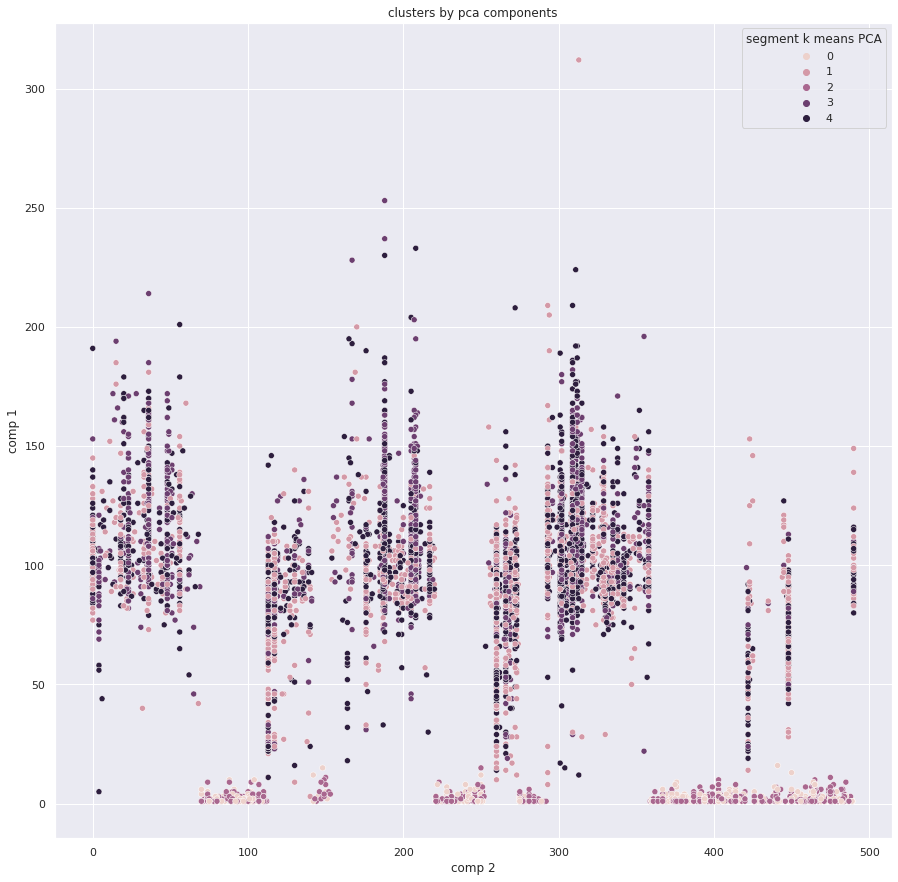

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 7777 non-null   int64  
 1   country              7777 non-null   int64  
 2   release_year         7777 non-null   int64  
 3   rating               7777 non-null   int64  
 4   comp 1               7777 non-null   int64  
 5   comp 2               7777 non-null   int64  
 6   comp 3               7777 non-null   int64  
 7   comp 4               7777 non-null   int64  
 8   comp 5               19 non-null     float64
 9   segment k means PCA  7777 non-null   int32  
dtypes: float64(1), int32(1), int64(8)
memory usage: 638.0 KB


In [80]:
df = pd.concat([new_netflix_df,pd.DataFrame(score)],axis=1)
df.columns.values[-5:]=['comp 1','comp 2','comp 3','comp 4','comp 5']
df['segment k means PCA'] = kmeans.labels_

#df = df.set_index(df['show_id'])
#f_mm.head()

x_axis = df['comp 2']
y_axis = df['comp 1']
plt.figure(figsize=(15,15))
sns.scatterplot(x_axis,y_axis,hue=df['segment k means PCA'])
plt.title('clusters by pca components')
plt.show()


df.info()

# **CONCLUSION**

**1. LDA has recommended much more similar titles based on our pick**

**2. Recommendation system works perfectly well with description column**

**3. After applying K - means optimal value of number of clusters is 5**

